# Checkpoint 3

**Due: Friday, 3 December, 2021 at 5:00pm GMT**

Total points: 100

### Read This First
1. Use the constants provided in the cells. Do not use your own constants.

2. Wherever you see `raise NotImplementedError()`, remove that line and put your code there.

3. Put the code that produces the output for a given task in the cell indicated. You are welcome to add as many cells as you like for imports, function definitions, variables, etc.

4. Your notebook must run correctly when executed once from start to finish. Your notebook will be graded based on how it runs, not how it looks when you submit it. To test this, go to the *Kernel* menu and select *Restart & Run All*.

5. Once you are happy with it, clear the output by selecting *Restart & Clear Output* from the *Kernel* menu.

6. Submit through Noteable.

In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import time

In [2]:
from scipy import integrate

In [3]:
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 14

## Problem 1: the flight of batted baseballs (50 pts)

Batted baseballs experience enough air resistance to alter their paths from a simple parabolic motion. To properly model the flight of a baseball, we must consider the drag force, which is defined as

$
\begin{align}
\large
F_{D} = -\frac{1}{2} C_{D} A \rho v^{2},
\end{align}
$

where $C_{D}$ is the drag coefficient, $A$ is the cross-sectional area of the ball, $\rho$ is the density of air, and $v$ is the velocity of the ball relative to the air. The drag force is oriented opposite to the velocity of the ball.

The system of equations describing the motion of an object experiencing the forces of gravity and air resistance is given by

$
\begin{align}
\large
\frac{dx}{dt} = v_{x}
\end{align}
$

$
\begin{align}
\large
\frac{dy}{dt} = v_{y}
\end{align}
$

$
\begin{align}
\large
\frac{dv_{x}}{dt} = - \frac{F_{D_x}}{m}
\end{align}
$

$
\begin{align}
\large
\frac{dv_{y}}{dt} = - \frac{F_{D_y}}{m} - g
\end{align}
$

where $F_{D_x}$ and $F_{D_y}$ are the $x$ and $y$ components of the drag force and $m$ is the mass of the ball.

The cell below defines a function describing simple projectile motion without air resistance.

## Task 1: 20 pts

Compute the motion of a batted ball **experiencing air resistance** under the following conditions.

1. The initial position of the ball is x = 0 m and y = 1 m (the approximate height of a hittable pitch).
2. The initial velocity of the ball is 50 m/s at an angle of 40 degrees with respect to the ground.
3. The ball will land in the seating area beyond the field of play. Nearest to the field, the seats are at a height of 3.5 m up from the ground. The ball should be considered to have landed when it reaches this height (3.5 m).

To do this you must define a new system of equations describing the motion of the ball under gravity and air resistance. You may start with the `projectile_motion` defined function above if you like. The relevant constants are provided in the cell below. Use these in your calculation.

In the cell with `task1`, write a function that returns the final x displacement of the baseball in meters when it lands in the stands. Your answer must be within 0.5 m of the correct answer.

In [4]:
# baseballs
m = 0.145 # mass in kg
c = 23.2  # circumference in cm
r = c / 2 / np.pi
A = np.pi * (r)**2 / 10000 # m^2
Cd = 0.34

# Earth-related constants
rhoE = 1.19 # air density at sea level kg/m^3
g = 9.80665 # m/s^2

In [5]:
g = 9.80665 # m/s^2
def projectile_motion(t, f):
    """
    f0 = x  => dx/dt  = vx
    f1 = y  => dy/dt  = vy
    f2 = vx => dvx/dt = 0
    f3 = vy => dvy/dt = - g
    """
    
    vals = np.zeros_like(f)
    vals[0] = f[2]
    vals[1] = f[3]
    vals[2] = 0
    vals[3] = - g

    return vals

Time to target = 5.21 s
Range to target, xmax = 125.94 m
Final height, ymax = 3.50 m


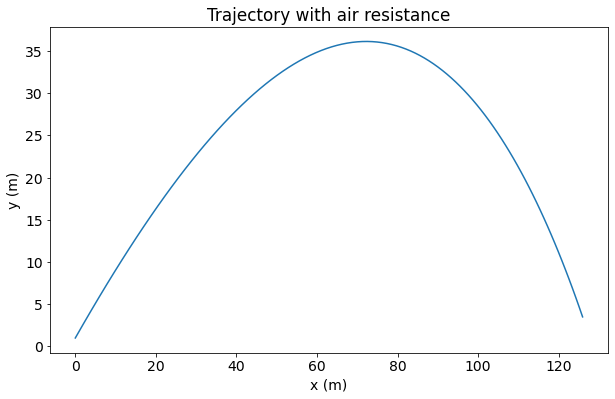

In [6]:
# define  friction constant.
k = 0.5 * Cd * rhoE * A

#initial speed 50m/s and angle 40 deg to the horizontal
v0 = 50
phi0 = np.radians(40)

def projectile_friction(t, f):
    x, xdot, y, ydot = f
    #speed is square root of sum of squares of speeds
    speed = np.sqrt(xdot**2 + ydot**2)
    #acceleration in x given by Fd_x/m = -kv_x^2/m
    xdotdot = -k/m * speed * xdot
    #acceleration in x given by Fd_x/m and gravity = -kv_y^2/m - g
    ydotdot = -k/m * speed * ydot - g
    return xdot, xdotdot, ydot, ydotdot

#initial conditions of position and velocity: x0, v0_x, y0, v0_y
u0 = 0, v0 * np.cos(phi0), 1, v0 * np.sin(phi0)
#integrate up to some t final 
t0, tf = 0, 50

def hit_target_y(t, u):
    # We've hit the seats if the y-coordinate is 3.5.
    return u[2] - 3.5
#stop integration when we hit the seats
hit_target_y.terminal = True
#ball must be moving downwards (given by -1)
hit_target_y.direction = -1

#solve the ivp with terminate events
soln = integrate.solve_ivp(projectile_friction, (t0, tf), u0, dense_output=True,
                 events=(hit_target_y))
print('Time to target = {:.2f} s'.format(soln.t_events[0][0]))

#create an array of time points from 0 until impact
t1 = np.linspace(0, soln.t_events[0][0], 100)

#get solution for time and get x y coords
sol = soln.sol(t1)
x1, y1 = sol[0], sol[2]
print('Range to target, xmax = {:.2f} m'.format(x1[-1]))
print('Final height, ymax = {:.2f} m'.format(y1[-1]))
plt.plot(x1, y1)
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Trajectory with air resistance')
plt.show()

In [7]:
def task1():
    #solve ivp
    soln = integrate.solve_ivp(projectile_friction, (t0, tf), u0, dense_output=True,events=(hit_target_y))
    #get solutions for range of t vals
    t = np.linspace(0, soln.t_events[0][0], 100)
    sol = soln.sol(t)
    x, y = sol[0], sol[2]
    #return final x value - max displacement
    return x[-1]

In [8]:
x_final = task1()
print (f"Final x displacement: {x_final} m.")

Final x displacement: 125.94039011589186 m.


In [9]:
#get the flight time for task1
flight_time1 = soln.t_events[0][0]
flight_time1

5.208626809600997

## Task 2: 20 pts

Can you hit a ball that will land in the same spot in half the time?

In the cell below, compute the initial velocity and angle required for a ball to land in the same spot as in Task 1, but in half the time. Write a function, `task2`, that returns the **magnitude of the initial velocity in m/s** and **the angle with respect to the horizon in degrees**. Your answer should result in a flight time that is half of the flight time from task 1 to within 1%.

In [10]:
def hit_target_x(t, u):
    # We've hit the seats if the x-coordinate is 125.9. - max displacement in task1
    return u[0] - 125.94039011589186
#terminate when reaching this point
hit_target_x.terminal = True
#positive x direction
hit_target_x.direction = 1

In [11]:
def task2():
# YOUR CODE HERE
    #get a range of intial conditions
    v0 = np.linspace(10,500,100)
    phi0 = np.radians(np.linspace(10,13,100)) #this range was found by trail and error
    t2 = []
    params = []
    #generate initial conditions u0 from points of v0 and phi0 given by array
    for i in range(100):
        for j in range(100):
            u0 = np.array([0, v0[i] * np.cos(phi0[j]), 1, v0[i] * np.sin(phi0[j])])
            #solve ivp
            soln = integrate.solve_ivp(projectile_friction, (t0, tf), u0, dense_output=True,events=(hit_target_x,hit_target_y))
            #get the flight time
            x = soln.t_events[0]
            #get the parameters
            v = v0[i]
            phi = phi0[j]
            #if flight time was calculated append to time to a time list and v and phi to a parameters list
            if x.size>0:
                t2.append(x)
                params.append([v,phi])
    #get index where time is less than 1% of half of time in task1
    k = np.where(abs(np.array(t2)-flight_time1/2) <= 0.01)[0]
    task2_v,task2_phi = np.array(params)[k][0]
    #return params
    return task2_v,task2_phi

In [12]:
# YOUR CODE HERE
task2()

(74.34343434343435, 0.22530613980290437)

In [13]:
#rerunning the function but for the parameters given in task2 to check final position and flight time
v0, phi0 = [74.34343434343435, 0.22530613980290437]
u0 = 0, v0 * np.cos(phi0), 1, v0 * np.sin(phi0)
soln = integrate.solve_ivp(projectile_friction, (t0, tf), u0, dense_output=True,events=(hit_target_x))
flight_time2 = soln.t_events[0][0]
t = np.linspace(0, flight_time2, 100)
sol = soln.sol(t)
x, y = sol[0], sol[2]
flight_time2, x[-1], y[-1]

(2.6042444999292496, 125.94039011589186, 3.517532365851024)

In [14]:
#get angle in degrees
theta = phi0*180/np.pi

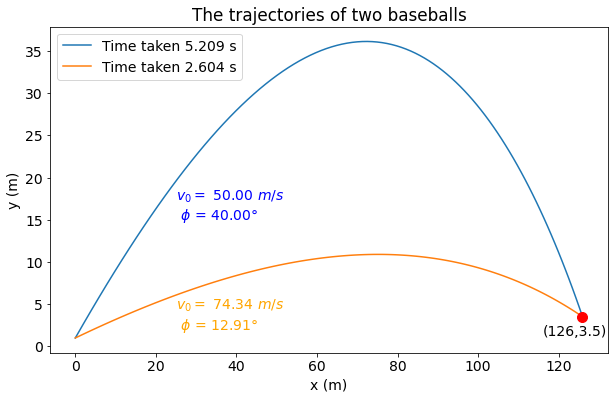

In [15]:
#plot the two trajectories and their parameters
plt.plot(x1,y1,label=('Time taken {:.3f} s'.format(flight_time1)))
plt.plot(x,y,label=('Time taken {:.3f} s'.format(flight_time2)))
plt.plot(125.9,3.5,'or',markersize=10)
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('The trajectories of two baseballs')
plt.annotate(('$v_0 =$ {:.2f} $m/s$ \n $\phi$ = {:.2f}$\degree$'.format(v0,theta)), xy=(25,2), color='orange')
plt.annotate(('$v_0 =$ {:.2f} $m/s$ \n $\phi$ = {:.2f}$\degree$'.format(50,40)), xy=(25,15), color='blue')
plt.annotate('(126,3.5)',xy=(116,1.3))
plt.legend()
plt.show()

## Task 3: 10 pts

Make an animation showing the flight of both baseballs (i.e., x displacement on x axis and y displacement on y axis). Time it so the baseballs land at the same time.

The axes function `ax.set_aspect('equal')` (for a given axes object called `ax`) can be used to make distances the same on the x and y axes.

In [16]:
# YOUR CODE HERE
import matplotlib.animation as animation
from IPython.display import HTML

In [17]:
#x coordinates of both balls in one list
X = [x,x1]
#y coordinates of both balls in one list
Y = [y,y1]

<IPython.core.display.Javascript object>


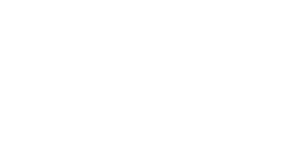

In [18]:
###this works!!!!
#this lets animation play
%matplotlib notebook
#set up figure
fig = plt.figure(figsize=(5,5))
ax1 = plt.axes(xlim=(0, 129), ylim=(0,80))
plt.xlabel('x (m)')
plt.ylabel('y (m)')
#intialize two lines with empty data
line = ax1.plot([], [], 'r--')[0]
line2 = ax1.plot([], [],'b--')[0]
#get legends
labels = ['$v_0 =$ {:.2f} $m/s$ \n $\phi$ = {:.2f}$\degree$ \n t = {:.2f}s'.format(v0,theta,flight_time2),'$v_0 =$ {:.2f} $m/s$ \n $\phi$ = {:.2f}$\degree$ \n t = {:.2f}s'.format(50,40,flight_time1)]
#initialize two scatter plots starting at x=0,y=1
scatter = ax1.scatter(0,1,s=100,label = labels[1],color='b')
scatter1 = ax1.scatter(0,1,s=100,label = labels[0],color='r')

#create animation function
def animate(i):
    R = [[0 for a in range(2)] for b in range(2)]
    for j in range(2):

        R[j][0] = X[j][i]
        R[j][1] = Y[j][i]
    #append both scatter plots with their x and y data
    scatter.set_offsets(R[1])
    scatter1.set_offsets(R[0])
    #append both lines with their x and y data
    line.set_data(x[:i], y[:i])
    line2.set_data(x1[:i], y1[:i])
    return scatter,scatter1,line,line2
#plot legends to distinguish between the balls
plt.legend()

#get animation
ani = animation.FuncAnimation(fig,animate,frames=200,interval=20,blit=True)

plt.show()

## Problem 2: harmonics of the square wave (25 pts)

A square wave is composed of a fundamental tone (at wavenumber $\omega=1$) and a series of harmonics at odd wavenumbers. The amplitudes of the harmonics obey the following relation:

$
\begin{align}
\large
\frac{|c_k(\omega)|}{|c_k(\omega=1)|} \propto \omega^{\alpha},
\end{align}
$

where $c_k(\omega)$ are the Fourier coefficients as a function of wavenumber of the square wave and $\alpha$ is a constant. $c_k(\omega=1)$ is the Fourier coefficient of the fundamental tone, i.e., at $\omega=1$.

In the cell below, you are given a square wave signal.

In [19]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 14

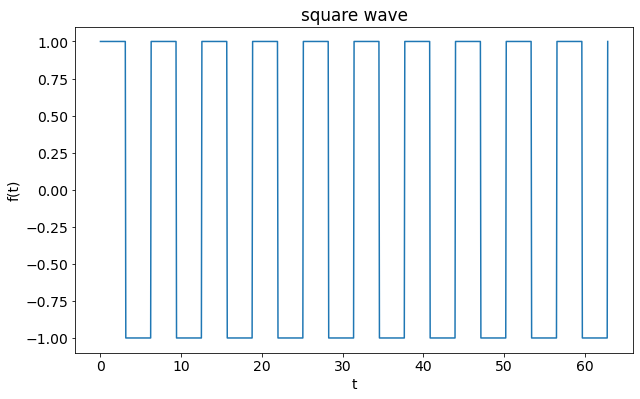

In [20]:
from scipy import signal

tsqu = np.linspace(0, 20*np.pi, 1001)
ysqu = signal.square(tsqu)

plt.plot(tsqu, ysqu)
plt.xlabel('t')
plt.ylabel('f(t)')
plt.title('square wave')
plt.show()

## Task 1: 20 pts

In the cell below, use the square wave signal define above to calculate the value of $\alpha$ from the previous expression. Do this by taking the FFT of the signal, locating the peaks at the harmonics, and fitting a curve to them. Do this in the cell below. Your code should print out the value of $\alpha$ and be within 1% of the correct answer.

You may find the `scipy.signal.find_peaks` function useful.

In [21]:
import scipy

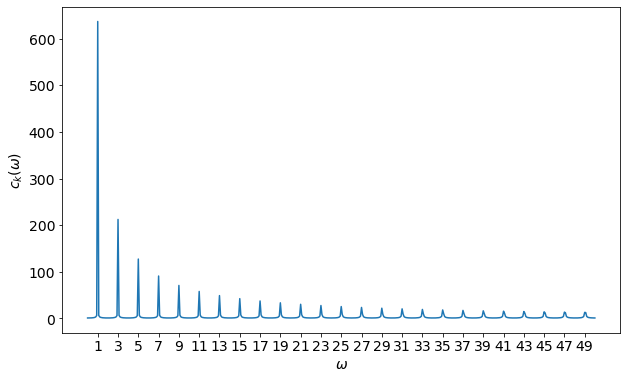

In [22]:
# YOUR CODE HERE
#maximum time
tmax = max(tsqu)
#fourier transform of the square wave
ck = np.fft.rfft(ysqu)
#omega = 2pi/T * k
#k goes from 0 to N/2 +1 as its a real fourier transform (cuts half the coefficients)
omega = 2*np.pi/tmax * np.arange(0,int(len(ysqu)//2+1))

#plot fourier coefficients against wavenumber
plt.plot(omega,abs(ck))
plt.xlabel('$\omega$')
plt.xticks(np.arange(1,51,2))
plt.ylabel('$c_k(\omega$)')
plt.show()

In [23]:
#get index of peaks using scipy.signal.find_peaks
peak_index = scipy.signal.find_peaks(abs(ck))[0]

In [24]:
abs(ck[np.where(omega==1)])

array([637.25665368])

In [25]:
#y is fourier coefficients at peaks normalised over fourier coefficient where omega=1
ydata = abs(ck[peak_index])/abs(ck[np.where(omega==1)])
#x is the omega values at the peaks
xdata = omega[peak_index]

In [26]:
#generate a straight line function (to fit to the loglog plot)
def func(x, a, b):
    return a*x + b

In [27]:
#curve fit the function to the log of the x and y data
alpha,b = scipy.optimize.curve_fit(func, np.log10(xdata), np.log10(ydata))[0]
alpha,b

(-0.999745761962539, -0.00017473818733961473)

In [28]:
#generate a time array to overlay plot of fit
t = np.linspace(0,50)
#use values generated by curve fit to fit the curve
fit = func(np.log10(t), alpha, b)

<ipython-input-28-a2e9baa40c60>:4: RuntimeWarning: divide by zero encountered in log10
  fit = func(np.log10(t), alpha, b)


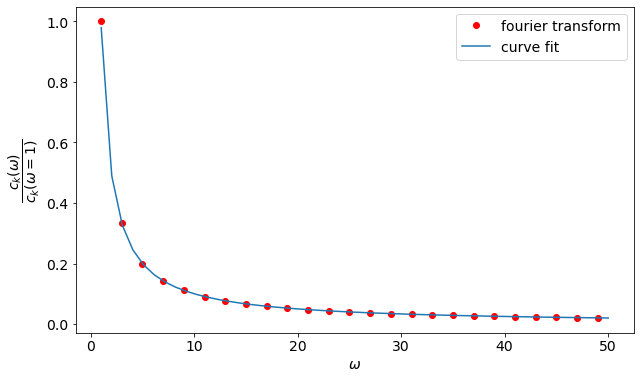

In [29]:
#plotting the peaks of these points
plt.plot(xdata, ydata, 'or', label='fourier transform')
#plot the curve, on non log plot the curve is 10**fit as the fit was in log base 10
plt.plot(t,10**(fit),label='curve fit')
plt.xlabel('$\omega$')
plt.ylabel('$\dfrac{c_k(\omega)}{c_k(\omega = 1)}$')
plt.legend()
plt.show()

alpha = decay rate = `-0.999745761962539`


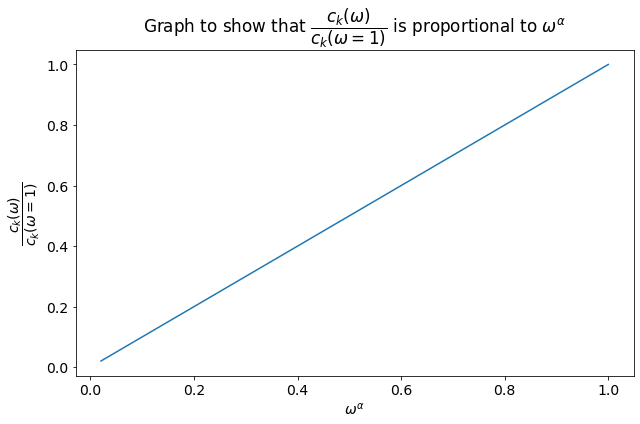

In [30]:
#checking that alpha seems like a good fit 
#straight line plot of omega to the power of alpha and the y values prove the proportionality equation is satisfied
plt.plot(omega[peak_index]**(alpha),ydata)
plt.xlabel(r'$\omega^{\alpha}$')
plt.ylabel('$\dfrac{c_k(\omega)}{c_k(\omega = 1)}$')
plt.title(r'Graph to show that $\dfrac{c_k(\omega)}{c_k(\omega = 1)}$ is proportional to $\omega^{\alpha}$')
plt.show()

In [31]:
#the straight line shows that the equation above is true. c_k is proportional to omega to the power of alpha

In [32]:
#creating a function that returns alpha using the code above
def problem2():
    tmax = max(tsqu)
    ck = np.fft.rfft(ysqu)
    omega = 2*np.pi/tmax * np.arange(0,int(len(ysqu)//2+1))
    peak_index = scipy.signal.find_peaks(abs(ck))[0]
    abs(ck[np.where(omega==1)])
    ydata = abs(ck[peak_index])/abs(ck[np.where(omega==1)])
    xdata = omega[peak_index]
    
    def func(x, a, b):
        return a*x + b
    
    alpha,b = scipy.optimize.curve_fit(func, np.log10(xdata), np.log10(ydata))[0]

    return alpha

In [33]:
problem2()

-0.999745761962539

## Task 2: 5 pts

Plot the amplitude spectrum of the square wave signal vs. wavenumber, $\omega$. This should show the harmonics occuring at odd values of $\omega$, i.e., 1, 3, 5, 7... Include on the plot the locations of the harmonics, denoted by circles. Plot a curve that fits $\omega$ and amplitude of the harmonics. Plot this in log-log to better illustrate the relation between $\omega$ and amplitude. Include all appropriate labels, legends, etc.

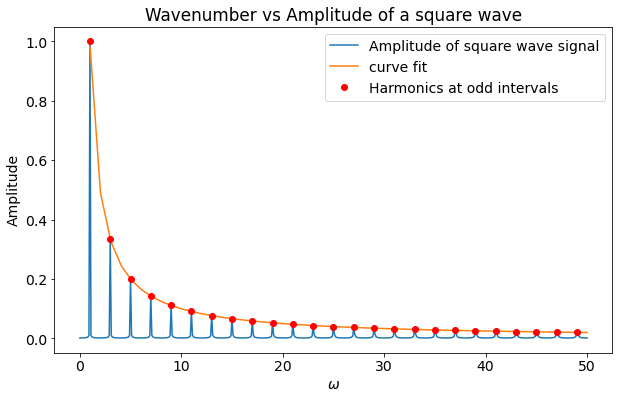

In [34]:
# YOUR CODE HERE
#plot the fourier transform
#plot the location of the peaks 
#plot the fit on top
plt.plot(omega,abs(ck)/abs(ck[np.where(omega==1)]),label='Amplitude of square wave signal')
plt.plot(t,10**(fit),label='curve fit')
plt.plot(xdata,ydata, 'or', markersize=6, label='Harmonics at odd intervals')
plt.legend()
plt.title('Wavenumber vs Amplitude of a square wave')
plt.xlabel('$\omega$')
plt.ylabel('Amplitude')
plt.show()

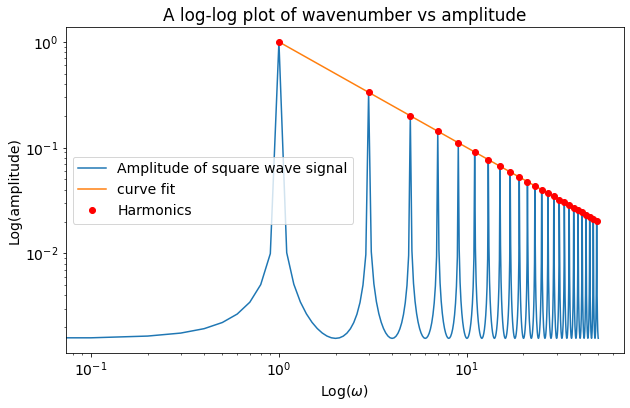

In [35]:
# YOUR CODE HERE
#Plot this in log-log to better illustrate the relation between  𝜔  and amplitude
plt.loglog(omega,abs(ck)/abs(ck[np.where(omega==1)]),label='Amplitude of square wave signal')
plt.loglog(t,10**fit, label='curve fit')
plt.loglog(xdata,ydata, 'or', markersize=6, label='Harmonics')
plt.legend()
plt.title('A log-log plot of wavenumber vs amplitude')
plt.xlabel('Log($\omega$)')
plt.ylabel('Log(amplitude)')
plt.show()

## Problem 3: the solar cycle (25 pts)

The number of sunspots visible on the Sun is known to have cyclic behavior. The data file, "sunspots.txt" (included with the checkpoint), contains counts of the number of sunspots per month since 1749. The data contains two columns:
1. the time in years denoting the mid-point of the month
2. the number of sunspots observes in that month

## Task 1: 10 pts

In the cell below, write a code to compute the period of the primary mode of the solar cycle (i.e., the period corresponding to the highest peak in the amplitude spectrum, excluding the peak at $k=0$). Your code should print out the value of the period in years to within 0.2 years of the correct answer (as computed with this method).

In [36]:
# YOUR CODE HERE
DATA = np.loadtxt('sunspots.txt')

#assign variable names to data columns
time = DATA[:,0]
N_spots = DATA[:,1]

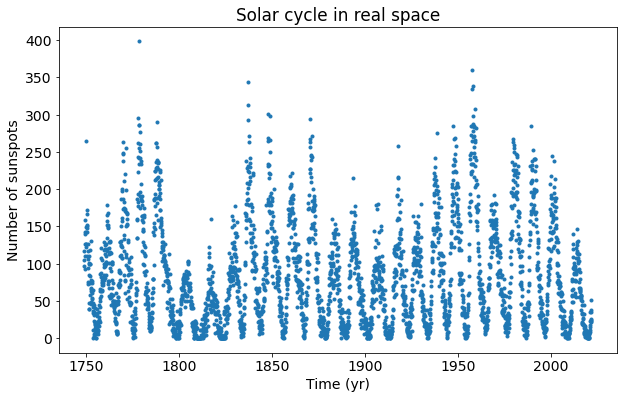

In [37]:
plt.plot(time,N_spots,'.')
plt.xlabel('Time (yr)')
plt.ylabel('Number of sunspots')
plt.title('Solar cycle in real space')
plt.show()

cyclical nature of sunspots tells us about the cylical nature of the sun, i.e. its period

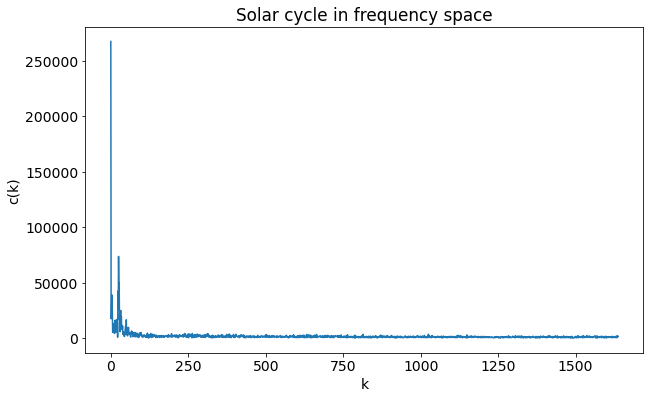

In [38]:
#plot the real fourier transform of the signal
c_k = np.fft.rfft(N_spots)
k = np.arange(0,int(len(N_spots)//2+1))
plt.plot(k,abs(c_k))
plt.xlabel('k')
plt.ylabel('c(k)')
plt.title('Solar cycle in frequency space')
plt.show()

In [39]:
#highest peak in the amplitude spectrum, excluding the peak at  𝑘=0 
peak = np.argmax(abs(c_k)[1:]) + 1 #the max peak is the maximum excluding k=0 (add 1 to correct indexing)

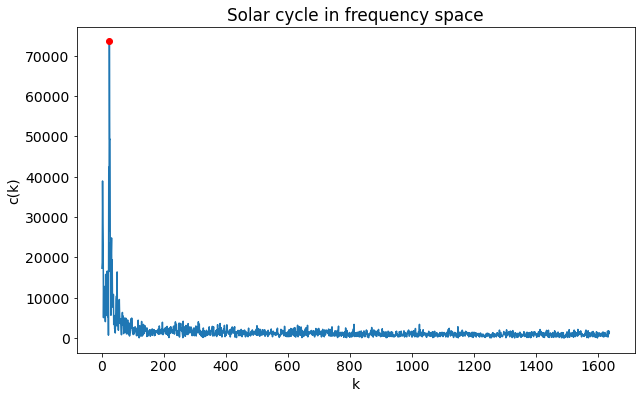

In [40]:
plt.plot(k[1:],abs(c_k[1:])) #cutting out first peak at k=0
plt.plot(k[peak],abs(c_k[peak]),'ro')
plt.xlabel('k')
plt.ylabel('c(k)')
plt.title('Solar cycle in frequency space')
plt.show()

In [41]:
def problem3_1():
    #fourier transform the data
    c_k = np.fft.rfft(N_spots)
    k = np.arange(0,int(len(N_spots)//2+1))
    #the max peak is the maximum excluding k=0
    peak = np.argmax(abs(c_k)[1:]) + 1
    
    
    sample_freq = 12 #/yr
    #get number of samples
    no_samples = len(time)
    #f = k*sampling freq/no. samples
    freq_sun = k[peak]*sample_freq/no_samples
    #T = 1/f
    period_sun = 1/freq_sun
    return period_sun  

In [42]:
problem3_1()

10.913333333333334

## Task 2: 10 pts

Using the period calculated previously, predict the time of the next solar maximum (i.e., the next time in the future when the number of sunspots will peak). Do this by creating a filter to include only the 30 values closest to the peak **on either side**. Create a new signal from the filtered Fourier coefficients and locate the last maximum. Use this to predict the time of the next maximum. Your code should print the month and year of the next maximum. Your answer should be accurate to within 2 months of the correct answer (as computed by this method).

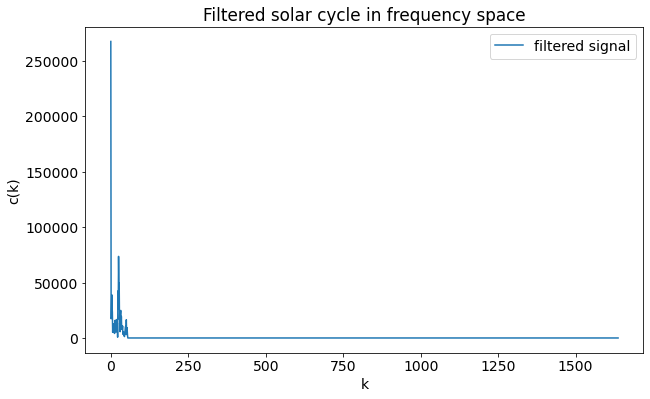

In [43]:
# YOUR CODE HERE
#create a filter to include only the 30 values closest to the peak on either side
c_k = np.fft.rfft(N_spots)
cknew = c_k.copy()
#set everything but 30 values on each side of the peak to 0, peak is at 25 so include all values up to the peak and 30 after
cknew[peak+30:] = 0

plt.plot(k,(abs(cknew)),label='filtered signal')
plt.xlabel('k')
plt.ylabel('c(k)')
plt.title('Filtered solar cycle in frequency space')
plt.legend()
plt.show()

In [44]:
#to get new signal take inverse fourier transform of this signal
ynew = np.fft.irfft(cknew)
#find last maximum of new signal
max_index = scipy.signal.find_peaks(ynew)[0][-1]

In [45]:
#maxima is at index 200-105  = 95 value from the last
print('maxima at', time[max_index])

maxima at 2013.623


In [46]:
#get decimal value of time to correspond to a month
dec_to_month = np.arange(0,1.02,1/24)[1::2]
dec_to_month

array([0.04166667, 0.125     , 0.20833333, 0.29166667, 0.375     ,
       0.45833333, 0.54166667, 0.625     , 0.70833333, 0.79166667,
       0.875     , 0.95833333])

In [47]:
months = ['January','Febuary','March','April','May','June','July','August','September','October','November','December']

In [48]:
def last_maximum():
    #get last maximum by indexing[-1]
    max_index = scipy.signal.find_peaks(ynew)[0][-1]
    #get decimal
    dec = (time[max_index]) % 1
    #time to next maximum is last maximum plus period found in task 1
    #get year by cutting off decimal
    year = int(time[max_index])
    #convert decimal to month
    month = months[np.where(np.isclose(dec,dec_to_month,rtol=1e-2, atol=1e-2))[0][0]]
    return str(month) + str(' ') + str(year)

In [49]:
last_maximum()

'August 2013'

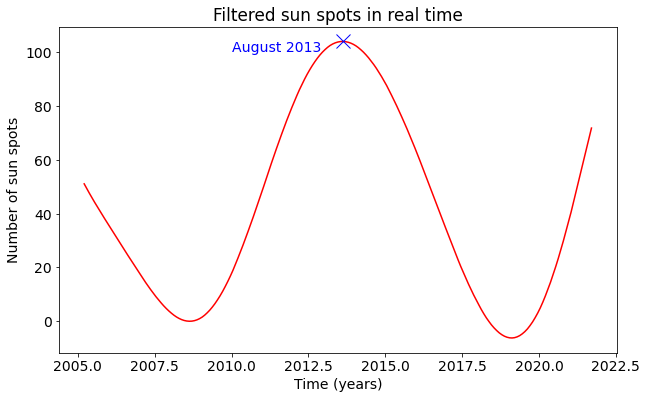

In [50]:
plt.plot(time[-200:-1],ynew[-200:-1],'r-', label="filtered") #zoom in to see peaks, last 200 values
plt.plot(time[max_index],ynew[max_index],'bx',markersize=14)
plt.annotate(last_maximum(),(2010,100),color='b')

plt.xlabel('Time (years)')
plt.ylabel('Number of sun spots')
plt.title('Filtered sun spots in real time')
plt.show()

In [51]:
def Problem3_2():
    #get last maximum by indexing[-1]
    max_index = scipy.signal.find_peaks(ynew)[0][-1]
    #get decimal
    dec = (time[max_index] + problem3_1()) % 1
    #time to next maximum is last maximum plus period found in task 1
    time[max_index] + problem3_1()
    #get year by cutting off decimal
    year = int(time[max_index]+ problem3_1())
    #convert decimal to month
    month = months[np.where(np.isclose(dec,dec_to_month,rtol=1e-2, atol=1e-2))[0][0]]
    return str(month) + str(' ') + str(year)

In [52]:
Problem3_2()

'July 2024'

## Task 3: 5 pts

Make a plot including the original data of the number of sunspots vs. time, your filtered signal from the previous task, and a vertical line denoting the predicted time of the next maximum. Include all appropriate labels, units, and legends.

In [53]:
#time to next maximum is last maximum plus period found in task 1
next_maximum = time[max_index] + problem3_1()

In [54]:
next_maximum

2024.5363333333335

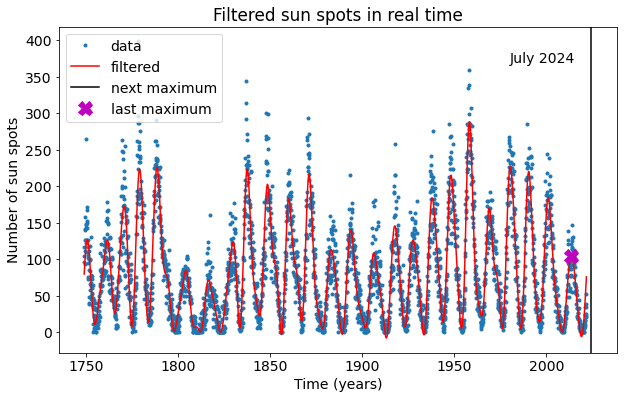

In [55]:
#plot real data
plt.plot(time,N_spots,'.',label='data')
#plot filtered signal
plt.plot(time,(ynew),'r-', label="filtered")
#plot next maximum
plt.axvline(next_maximum,color='black',label='next maximum')
#plot last maximum
plt.plot(time[max_index],ynew[max_index],'mX',markersize=14,label='last maximum')
#get date of next maximum
plt.annotate((Problem3_2()),(1980,370))
plt.xlabel('Time (years)')
plt.ylabel('Number of sun spots')
plt.title('Filtered sun spots in real time')
plt.legend()
plt.show()